In [1]:
# Data related libraries
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
from IPython.display import display, HTML
import networkx as nx

# Convenient helpers
from copy import copy
from time import time
from collections import defaultdict, Counter
from sklearn.preprocessing import minmax_scale

# Printing libraries and settings
# import warnings; warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format','{0:.2f}'.format)

%matplotlib inline

## Problem

In [43]:
a = """75
95 64
17 47 82
18 35 87 10
20 04 82 47 65
19 01 23 75 03 34
88 02 77 73 07 63 67
99 65 04 28 06 16 70 92
41 41 26 56 83 40 80 70 33
41 48 72 33 47 32 37 16 94 29
53 71 44 65 25 43 91 52 97 51 14
70 11 33 28 77 73 17 78 39 68 17 57
91 71 52 38 17 14 91 43 58 50 27 29 48
63 66 04 68 89 53 67 30 73 16 69 87 40 31
04 62 98 27 23 09 70 98 73 93 38 53 60 04 23"""

In [48]:
numbers = [b.split(" ") for b in a.split("\n")]

In [49]:
numbers

[['75'],
 ['95', '64'],
 ['17', '47', '82'],
 ['18', '35', '87', '10'],
 ['20', '04', '82', '47', '65'],
 ['19', '01', '23', '75', '03', '34'],
 ['88', '02', '77', '73', '07', '63', '67'],
 ['99', '65', '04', '28', '06', '16', '70', '92'],
 ['41', '41', '26', '56', '83', '40', '80', '70', '33'],
 ['41', '48', '72', '33', '47', '32', '37', '16', '94', '29'],
 ['53', '71', '44', '65', '25', '43', '91', '52', '97', '51', '14'],
 ['70', '11', '33', '28', '77', '73', '17', '78', '39', '68', '17', '57'],
 ['91',
  '71',
  '52',
  '38',
  '17',
  '14',
  '91',
  '43',
  '58',
  '50',
  '27',
  '29',
  '48'],
 ['63',
  '66',
  '04',
  '68',
  '89',
  '53',
  '67',
  '30',
  '73',
  '16',
  '69',
  '87',
  '40',
  '31'],
 ['04',
  '62',
  '98',
  '27',
  '23',
  '09',
  '70',
  '98',
  '73',
  '93',
  '38',
  '53',
  '60',
  '04',
  '23']]

In [45]:
g = nx.DiGraph()
line_count = 0
g.add_node("final_node")
for line in numbers:
    number_count = 0
    
    for number in line:
        g.add_node(f"{line_count}_{number_count}")
        
        # Add edges after the first line
        if line_count > 0:
            
            # Nicht ganz links
            if number_count != 0:
                g.add_edge(f"{line_count - 1}_{number_count - 1}", 
                           f"{line_count}_{number_count}", 
                           weight = (-1) * int(numbers[line_count][number_count]))
            
            if number_count != line_count:
                g.add_edge(f"{line_count - 1}_{number_count}", 
                           f"{line_count}_{number_count}", 
                           weight = (-1) * int(numbers[line_count][number_count]))
                
        if line_count == len(numbers) - 1:
            for k in range(line_count):
                g.add_edge(f"{line_count}_{number_count}", "final_node", weight=0)
        
        number_count += 1
        
    line_count += 1

## Solution

In [47]:
# Add top node value and shortest path from top to bottum (negated values)
max_sum = 74 + (-1) * nx.shortest_path_length(g, 
                                              source = "0_0", 
                                              target = "final_node", 
                                              weight = "weight", 
                                              method = "bellman-ford")

print(f"Maximum sum: {max_sum}")

Maximum sum: 1073


## Visualization

In [35]:
node_pos = {}
line_count = 0
for line in numbers:
    number_count = 0
    
    for number in line:
        node_pos[f"{line_count}_{number_count}"] = [number_count, -line_count]
        number_count += 1
        
    line_count += 1
node_pos["final_node"] = [0, -line_count]

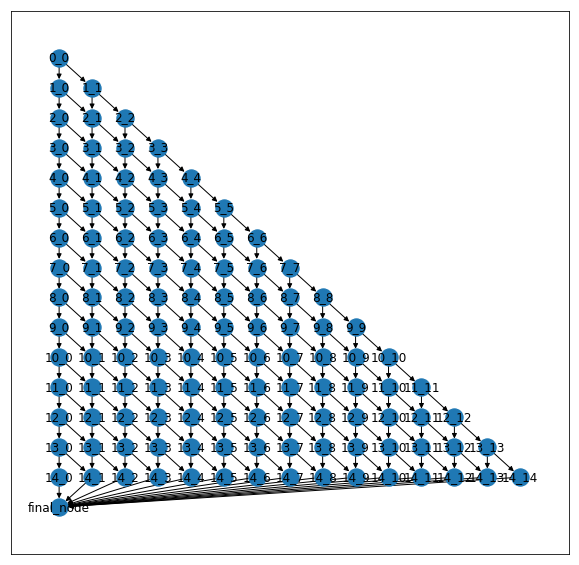

In [38]:
plt.gcf().set_size_inches(10,10)
nx.draw_networkx(g, pos = node_pos)
plt.savefig("Euler18_Pyramide.png", dpi = 250)